In [83]:
%matplotlib inline

import numpy as np
import pandas as pd
import sklearn.svm
import seaborn as sns
import scipy.io as sio

In [84]:
mat = sio.loadmat('./data/ex6data1.mat')
print(mat.keys())
data = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])
data['y'] = mat.get('y')

data.head()

dict_keys(['y', '__version__', '__header__', 'X', '__globals__'])


,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


# visualize data
pay attention to the edge case at the left hand side

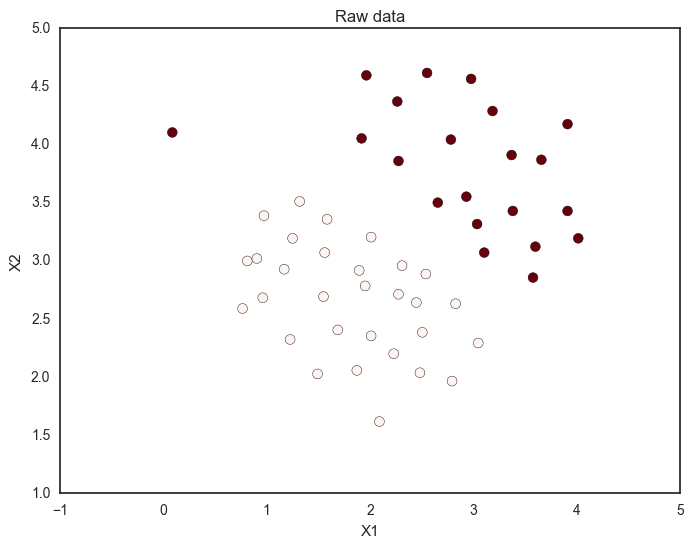

In [85]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['y'], cmap='Reds')
ax.set_title('Raw data')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

# try $C=1$
http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

In [86]:
svc1 = sklearn.svm.LinearSVC(C=1, loss='hinge')
svc1.fit(data[['X1', 'X2']], data['y'])
svc1.score(data[['X1', 'X2']], data['y'])

0.98039215686274506

In [87]:
data['SVM1 Confidence'] = svc1.decision_function(data[['X1', 'X2']])

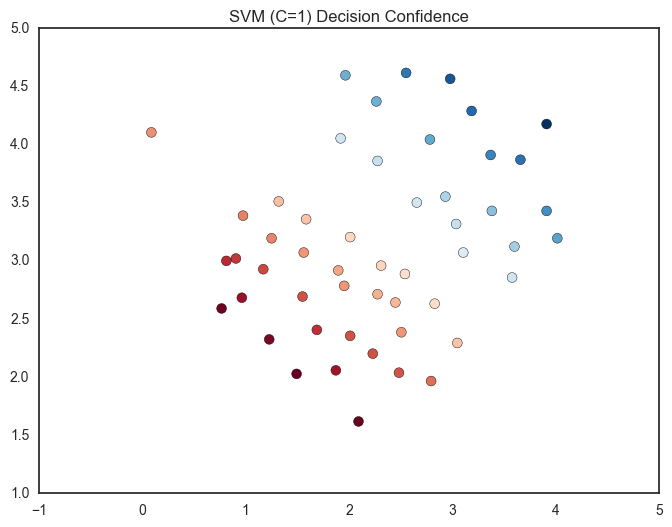

In [88]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM1 Confidence'], cmap='RdBu')
ax.set_title('SVM (C=1) Decision Confidence')

# try $C=100$
with large C, you try to overfit the data, so the left hand side edge case now is categorized right

In [89]:
svc100 = sklearn.svm.LinearSVC(C=100, loss='hinge')
svc100.fit(data[['X1', 'X2']], data['y'])
svc100.score(data[['X1', 'X2']], data['y'])

1.0

In [90]:
data['SVM100 Confidence'] = svc100.decision_function(data[['X1', 'X2']])

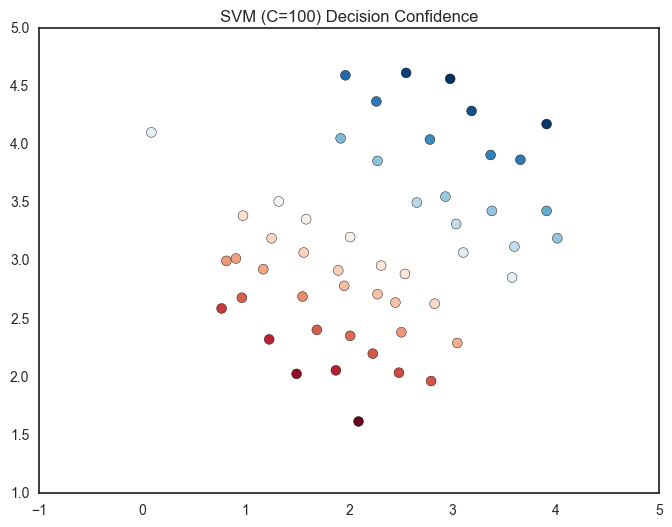

In [91]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM100 Confidence'], cmap='RdBu')
ax.set_title('SVM (C=100) Decision Confidence')

In [92]:
data

,X1,X2,y,SVM1 Confidence,SVM100 Confidence
0,1.964300,4.5957,1,0.804456,3.667373
1,2.275300,3.8589,1,0.386386,1.770079
2,2.978100,4.5651,1,1.379671,4.701322
3,2.932000,3.5519,1,0.524271,1.565568
4,3.577200,2.8560,1,0.337493,0.164337
5,4.015000,3.1937,1,0.872703,1.679132
6,3.381400,3.4291,1,0.689974,1.691352
7,3.911300,4.1761,1,1.614240,4.554579
8,2.782200,4.0431,1,0.837048,2.894394
9,2.551800,4.6162,1,1.169044,4.382942
